**Multiple Linear Regression**

*Advertising data*



### Step 1 : Importing and Understanding Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Importing advertising.csv
data = pd.read_csv("advertising.csv")

In [ ]:
# Looking at the first five rows
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
# What type of values are stored in the columns?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# Let's look at some statistical information about our dataframe.
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Step 2: Visualising Data

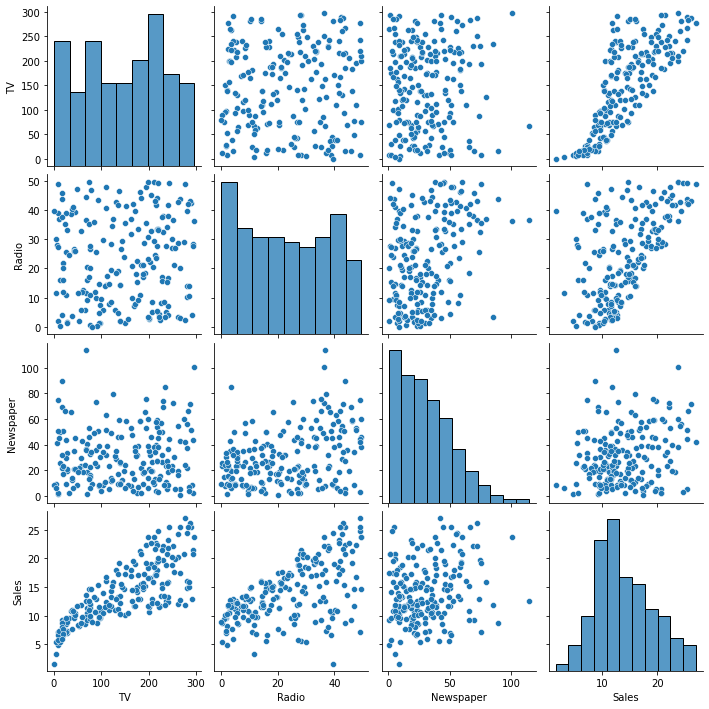

In [ ]:
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(data);

### Step 3: Splitting the Data for Training and Testing

In [ ]:
# Putting feature variable to X
X = data.drop("Sales",axis=1)

# Putting response variable to y
y = data[["Sales"]]

In [ ]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

### Step 4 : Performing Linear Regression



In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

In [ ]:
# fit the model to the training data
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Step 5 : Model Evaluation

In [ ]:
lr.intercept_

array([2.65278967])

In [ ]:
lr.coef_.reshape(-1,1)

array([[ 0.04469599],
       [ 0.1875657 ],
       [-0.00032275]])

In [ ]:
coeff_df = pd.DataFrame(lr.coef_.reshape(-1,1),X_test.columns,columns=['Coefficient'])

In [ ]:
coeff_df

,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


### Step 6 : Predictions

In [ ]:
y_pred = lr.predict(X_test)

### Step 7: Calculating Error Terms

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)

In [ ]:
print("Mean_Squared_Error :",mse)
print("r_squared_value :",r_squared)

Mean_Squared_Error : 1.8506819941636963
r_squared_value : 0.9058622107532246


### Another approach : Checking for P-value Using STATSMODELS

In [ ]:
import statsmodels.api as sm
import pandas.testing as tm

X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line

lr_1 = sm.OLS(y_train,X_train_sm).fit()

In [ ]:
lr_1.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [ ]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Sun, 11 Oct 2020   Prob (F-statistic):           9.97e-66
Time:                        10:15:25   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

As we can see above the Null Hypothesis **(P>|t|)** value for the feature 
"News Paper" is greater than the **"0.05"** so we failed to reject the Null Hypothesis.

Hence we can remove the "News Paper" Feature.

**NOTE**:  The value  "0.05" is assumed here, for some cases it's 0.01 but the thumb rule is "0.05".

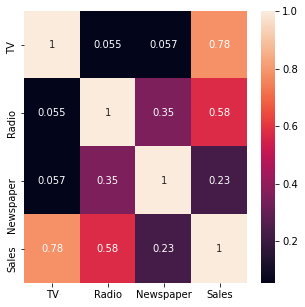

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(data.corr(),annot=True)

### Implementing the results and running the model again

In [ ]:
# Removing Newspaper from our dataset
X_train_new = X_train[['TV','Radio']]
X_test_new = X_test[['TV','Radio']]

In [ ]:
# Model building
lr.fit(X_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Making predictions
y_pred_new = lr.predict(X_test_new)

Text(0, 0.5, 'Sales')

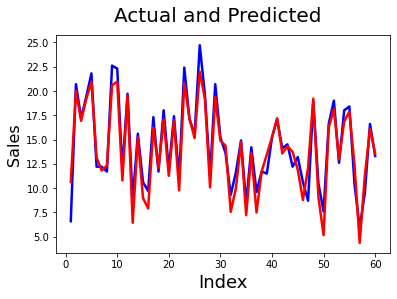

In [ ]:
#Actual vs Predicted
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                               # Y-label

Text(0, 0.5, 'ytest-ypred')

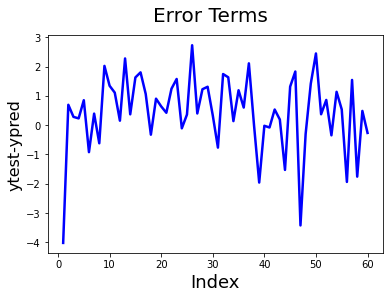

In [ ]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_new)
r_squared = r2_score(y_test, y_pred_new)

In [ ]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 1.7847400520902805
r_square_value : 0.909216449171822


In [ ]:
X_train_final = X_train_new
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_final = sm.add_constant(X_train_final)
# create a fitted model in one line
lr_final = sm.OLS(y_train,X_train_final).fit()

print(lr_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Sun, 11 Oct 2020   Prob (F-statistic):           4.46e-67
Time:                        10:20:45   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

### Model Refinement Using recursive feature elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe = RFE(lr, 2)

In [ ]:
rfe = rfe.fit(X_train, y_train["Sales"])

In [ ]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True False]
[1 1 2]


**That beign said "News Paper" feature has to be removed**

And now further more building a model just with the "News Paper" feature.

In [ ]:
import pandas as pd
import numpy as np
# Importing dataset
advertising_multi = pd.read_csv('advertising.csv')

x_news = advertising_multi['Newspaper'].values.reshape(-1,1)

y_news = advertising_multi['Sales'].values.reshape(-1,1)

# Data Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_news, y_news, 
                                                    train_size=0.7 , 
                                                    random_state=110)

# Required only in the case of simple linear regression
#X_train = X_train[:,np.newaxis]
#X_test = X_test[:,np.newaxis]

# Linear regression from sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Fitting the model
lm.fit(X_train,y_train)

# Making predictions
y_pred = lm.predict(X_test)

# Importing mean square error and r square from sklearn library.
from sklearn.metrics import mean_squared_error, r2_score

# Computing mean square error and R square value
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Printing mean square error and R square value
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 23.84732008485191
r_square_value : 0.08182413570736657


The R squared value (coefficient of determination) for these independent and dependent variable is not good enough hence we can eliminate the "News Paper" feature